In [1]:
import numpy as np
from sldata import SessionData
import matplotlib.pyplot as plt
import sys

### Populate SessionData

In [2]:
mouse_id = "7004"
session_id = "m6"
experiment = "clickbait-motivate"

print("=== Testing SessionData Class ===")
print(f"Loading data for {mouse_id}_{session_id}...")

data = SessionData(
    mouse_id=mouse_id,
    session_id=session_id,
    experiment=experiment,
    min_spikes=50,
    verbose=True)

=== Testing SessionData Class ===
Loading data for 7004_m6...
Successfully loaded spike_times from S:\clickbait-motivate\kilosorted\7004\m6\spike_times.npy
Successfully loaded spike_templates from S:\clickbait-motivate\kilosorted\7004\m6\spike_templates.npy
Successfully loaded templates from S:\clickbait-motivate\kilosorted\7004\m6\templates.npy
Successfully loaded sniff from S:\clickbait-motivate\preprocessed\7004\m6\sniff.npy
Loaded data: ['spike_times', 'spike_templates', 'templates', 'sniff']
Successfully loaded events from S:\clickbait-motivate\bonsai\7004\m6\events.csv
Filtering and decimating sniff signal from 30kHz to 1kHz...
Found 19665 peaks in sniff signal
Peak times range: 115.0 - 2734032.0 ms
Loaded 30 clusters for 7004_m6
Loaded sniff data: 2734190 samples
Found 19665 sniff events


### Sniff Signal

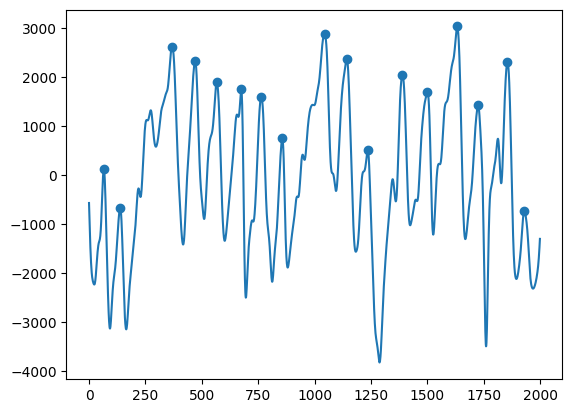

In [3]:
start = 5000
end = 7000
sniffs = np.array([round(x) for x in data.sniff_times if start < x < end])

plt.plot(data.sniff[start:end])
plt.scatter(sniffs-start, data.sniff[sniffs])

Created population matrix: 30 neurons x 100 time bins
Time range: 500000.0 - 505000.0 ms
Bin size: 50 ms


Text(0.5, 0, '50ms bins')

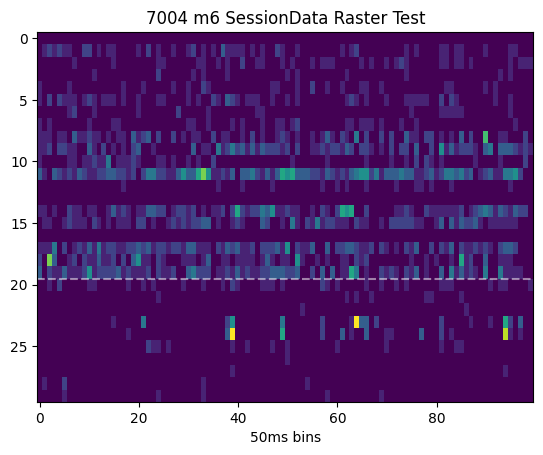

In [4]:
### Population Raster
start_time=1000*500
end_time=start_time+5000 
bin_size_ms=50

pop_matrix, time_bins, included_clusters = data.create_population_raster(
    start_time=start_time,
    end_time=end_time, 
    bin_size_ms=bin_size_ms,
    zscore_neurons=False,
    cluster_ids=None
)

# Check when regions switch
for ii in range(len(data.clusters)):
    if data.clusters[ii]['best_channel'] > 16:
        region_line = ii
        break

plt.imshow(pop_matrix, aspect='auto')
plt.axhline(region_line-.5, c='w', linestyle='dashed', alpha=.5)
plt.title(f"{mouse_id} {session_id} SessionData Raster Test")
plt.xlabel(f"{bin_size_ms}ms bins")

In [5]:
data.clusters[12]['n_spikes']

32134

Created sniff-locked raster for cluster 11: (19665, 1001) (sniffs x timesteps)


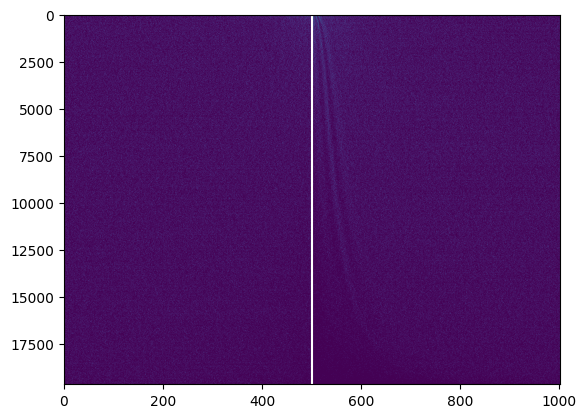

In [6]:
sniff_locked = data.create_sniff_locked_raster(cluster_idx=11, window_ms=500)
plt.imshow(sniff_locked, aspect='auto')
plt.axvline(500, color='w')

Created scatter data: 752482 spikes across 1 clusters and 19665 sniff events


\\wsl.localhost\Ubuntu-20.04\home\nghess\git-repos\sl-data\src\sldata\SessionData.py:1396: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0)


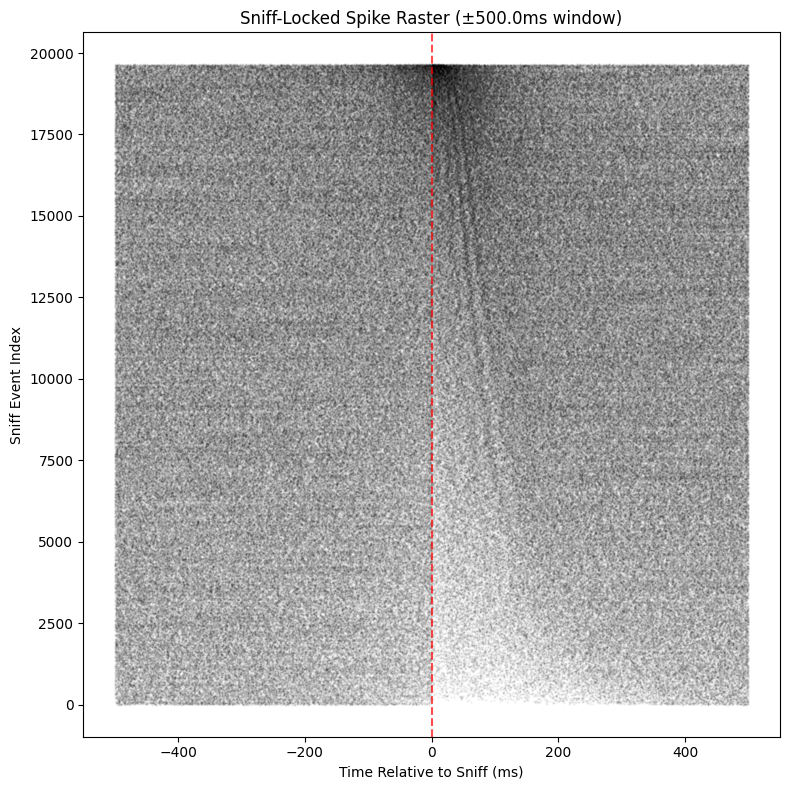

(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Sniff-Locked Spike Raster (±500.0ms window)'}, xlabel='Time Relative to Sniff (ms)', ylabel='Sniff Event Index'>)

In [7]:
data.plot_sniff_locked_scatter(cluster_indices=[11])

### Cluster Attribute

In [8]:
data.clusters[5]

{'cluster_id': 6,
 'best_channel': 7,
 'spike_times': array([6.01666667e+01, 8.20333333e+01, 1.08900000e+02, ...,
        2.73406613e+06, 2.73407190e+06, 2.73414377e+06]),
 'waveform_template': array([ 0.66134834,  0.7171258 ,  0.76039344,  0.7972169 ,  0.81775874,
         0.8344744 ,  0.8551389 ,  0.89485407,  0.9583992 ,  1.0149755 ,
         1.0340434 ,  1.0176849 ,  1.0122094 ,  1.0913494 ,  1.1153669 ,
         0.7808336 , -0.20560436, -1.722188  , -3.3102663 , -4.4216413 ,
        -4.723574  , -4.2719274 , -3.5354939 , -2.8491797 , -2.33166   ,
        -1.9007369 , -1.4739951 , -1.0478702 , -0.640605  , -0.29935652,
        -0.02913988,  0.20396501,  0.40878755,  0.58274484,  0.7222182 ,
         0.83368665,  0.9092472 ,  0.9674469 ,  0.9992481 ,  1.0117161 ,
         1.0078889 ,  0.98629963,  0.95084894,  0.9103155 ,  0.86583495,
         0.826777  ,  0.7956288 ,  0.7660784 ,  0.7063564 ,  0.6328571 ,
         0.5667752 ,  0.51657546,  0.47313794,  0.44291496,  0.40830004,
    

### Cluster Filtering

In [9]:
hc_data = data.filter_clusters('best_channel <= 16')
ob_data = data.filter_clusters('best_channel > 16')

Filtered from 30 to 21 clusters using: best_channel <= 16
Filtered from 30 to 9 clusters using: best_channel > 16


### Bonsai Events

In [10]:
hc_data.events

,trial_number,timestamp,poke_left,poke_right,centroid_x,centroid_y,target_cell,iti,water_left,water_right,reward_state,click,flip_state,speed,direction,drinking,timestamp_ms
0,0,2025-06-29 18:39:59.988211200,False,False,500,910,12.0,False,True,False,False,False,False,0.000000,0.000000,False,8801
1,0,2025-06-29 18:40:00.012992000,False,False,490,934,12.0,False,True,False,False,False,False,26.000000,0.000366,False,8834
2,0,2025-06-29 18:40:00.035110400,False,False,478,953,12.0,False,True,False,False,False,False,22.472204,0.000290,False,8868
3,0,2025-06-29 18:40:00.065024000,False,False,472,960,12.0,False,True,False,False,False,False,9.219544,0.000107,False,8901
4,0,2025-06-29 18:40:00.102835200,False,False,473,959,12.0,False,True,False,False,False,False,1.414214,1.570781,False,8934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81512,49,2025-06-29 19:25:17.324057600,False,False,230,228,NaN,False,True,False,False,False,False,1.000000,0.000000,False,2725859
81513,49,2025-06-29 19:25:17.358425600,False,False,230,228,NaN,False,True,False,False,False,False,0.000000,0.000000,False,2725893
81514,49,2025-06-29 19:25:17.389606400,False,False,230,228,NaN,False,True,False,False,False,False,0.000000,0.000000,False,2725926
81515,49,2025-06-29 19:25:17.424153600,False,False,230,228,NaN,False,True,False,False,False,False,0.000000,0.000000,False,2725959


In [11]:
flip_t, flip_f = data.filter_events('flip_state == True', return_false_condition=True)

Filtered spikes with condition 'flip_state == True': 409944/857101 spikes retained
False condition spikes: 440995/857101 spikes


### Alignment Inspection

In [13]:
# from scipy.signal import decimate

# reward_path = f"S:/{experiment}/preprocessed/{mouse_id}/{session_id}/reward.npy"
# reward_raw = np.load(reward_path)
# reward_1khz = decimate(reward_raw, 30, ftype='iir', zero_phase=True)

In [14]:
# # Covert voltages to bool
# start = data.events['timestamp_ms'][0]
# reward_bool = np.zeros_like(reward_1khz)
# reward_idx = np.where(reward_1khz > 0)
# reward_bool[reward_idx] = 1
# reward_bool[:start+25000] = 0  # Clean up initial reward noise (find a clean solution for this)
# reward_transition = np.where(np.diff(reward_bool) == 1)[0]
# reward_transition[0] # First reward state transition

In [15]:
# # Preview reward state boolean
# plt.plot(reward_bool[:1000*250])
# plt.axvline(data.events['timestamp_ms'][0], color='r', linestyle='--')
# plt.axvline(reward_transition[0], color='g', linestyle='--')
# plt.title('Start of Video and First Reward')
# plt.show()

In [16]:
# # Pick a transition to check
# reward_state_transition = reward_transition[-1]
# print(reward_state_transition)

In [17]:
# # Check for reward state transition in events dataframe
# data.events[data.events['timestamp_ms'].between(reward_state_transition-120, reward_state_transition+120)]